# 1. Pengenalan

---

Milestone 2

Nama  : Ilham Maulud

Batch : HCK-030

Tujuan:

Pada proyek ini, tujuan utamanya adalah membangun model prediksi risiko intrusi siber yang andal menggunakan dataset aktivitas pengguna dan serangan. Proses dimulai dengan Exploratory Data Analysis (EDA) untuk memahami distribusi data, mengidentifikasi kolom numerik dan kategorikal, serta menemukan pola awal yang relevan.

Selanjutnya, dilakukan preprocessing, termasuk encoding untuk kolom kategorikal dan scaling untuk kolom numerik, agar semua fitur berada dalam skala yang sesuai. Langkah ini penting agar algoritma seperti KNN, SVM, dan XGBoost dapat bekerja optimal.

Setelah preprocessing, beberapa algoritma machine learning dibandingkan menggunakan cross-validation. Model-model yang dievaluasi meliputi Decision Tree, Random Forest, KNN, SVM, dan XGBoost. Evaluasi dilakukan berdasarkan mean dan standar deviasi akurasi, sehingga model terbaik dipilih secara sistematis berdasarkan performa yang stabil dan tinggi.

Model terpilih kemudian dioptimalkan melalui hyperparameter tuning menggunakan GridSearchCV untuk menemukan kombinasi parameter yang menghasilkan performa terbaik. Hasil tuning menunjukkan XGBoost sebagai model dengan akurasi tertinggi (sekitar 90%), didukung precision, recall, dan F1-score yang seimbang, menandakan kemampuan model dalam mendeteksi serangan secara efektif.

Secara keseluruhan, seluruh rangkaian ini bertujuan untuk menghasilkan pipeline prediksi yang siap digunakan pada data baru, sehingga sistem deteksi intrusi siber dapat berjalan otomatis dan membantu meningkatkan keamanan jaringan dengan akurasi tinggi dan stabilitas yang terjamin.

---

# 2. Import Libaries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import joblib

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 3. Loading Data

Pada tahap ini, saya memulai dengan memuat **Cybersecurity Intrusion Detection Datase** yang diperoleh untuk analisis serangan siber. Data yang digunakan berisi informasi mengenai sesi aktivitas jaringan pengguna, termasuk detail seperti ukuran paket data, jenis protokol yang digunakan, jumlah percobaan login, durasi sesi, metode enkripsi yang diterapkan, skor reputasi IP, jumlah kegagalan login, tipe browser, serta indikator akses pada waktu yang tidak biasa. Data ini bertujuan untuk membantu mengidentifikasi pola-pola aktivitas mencurigakan yang dapat mengindikasikan adanya serangan siber atau pelanggaran keamanan. Proses ini mencakup langkah-langkah sebagai berikut:

1. Pengimporan Data: Data transaksi nasabah yang disimpan dalam format CSV diimpor menggunakan library seperti pandas. Data ini mencakup beberapa variabel yang relevan untuk segmentasi.

2. Pemeriksaan Data: Setelah data dimuat, saya melakukan pemeriksaan awal terhadap data untuk memastikan bahwa data yang diimpor sesuai dan tidak terdapat nilai yang hilang atau kesalahan dalam format. Pada tahap ini, saya juga memeriksa jumlah dan tipe data pada setiap kolom untuk memastikan bahwa seluruh data siap untuk diproses lebih lanjut.

3. Penyimpanan Data: Data yang telah siap digunakan disimpan dalam variabel DataFrame untuk dianalisis lebih lanjut.

In [2]:
# Import dataset
df = pd.read_csv('dataset.csv')

In [3]:
# Cek dataset
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [4]:
# Cek info setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


didalam info diatas, kita dapat melihat terdapat NaN yang ada di kolom `emcryption_used`. Untuk lebih jelaskan mari kita cek secara detail.

In [5]:
# Cek missing value
def missing_value(df) :
    missing = (
        df.isna()
        .mean()
        .mul(100)
        .rename("Percent")
        .to_frame()
        .assign(Count=lambda s: df.isna().sum())
        .sort_values("Percent", ascending=False)
    )
    return missing

In [6]:
missing_value(df)

,Percent,Count
encryption_used,20.614449,1966
network_packet_size,0.000000,0
session_id,0.000000,0
protocol_type,0.000000,0
login_attempts,0.000000,0
session_duration,0.000000,0
ip_reputation_score,0.000000,0
failed_logins,0.000000,0
browser_type,0.000000,0
unusual_time_access,0.000000,0


Kita bisa lihat bahwa terdapat 1966 NaN didalam kolom `encryption_used`, dimana itu melebihi 20% dari isi kolom `encryption_used`. Namun jika kita lihat di informasi tentang dataset ini, data NaN ini adalah user yang tidak menggunakan enskripsi protokol. Maka dari itu disini saya akan mengisi NaN didalam kolom `encryption_used` dengan **none**

In [7]:
# Mengisi NaN di kolom encryption_used
df['encryption_used'] = df['encryption_used'].fillna('none')

In [8]:
# Cek missing value
missing_value(df)

,Percent,Count
session_id,0.0,0
network_packet_size,0.0,0
protocol_type,0.0,0
login_attempts,0.0,0
session_duration,0.0,0
encryption_used,0.0,0
ip_reputation_score,0.0,0
failed_logins,0.0,0
browser_type,0.0,0
unusual_time_access,0.0,0


In [9]:
# Mengcopy data asli untuk menjaga data asli tidak berubah
data = df.copy()

# 4. EDA

Pada tahap Exploratory Data Analysis (EDA), saya lebih fokus pada pemahaman karakteristik dasar dari dataset tanpa terlebih dahulu menangani missing values (missval) dan outlier. Ada beberapa alasan mengapa pendekatan ini dipilih:

1. Tujuan EDA - Memahami Data Secara Menyeluruh:

    *  EDA bertujuan untuk memberikan gambaran umum mengenai distribusi data dan hubungan antar variabel, serta potensi outlier yang ada dalam dataset. Dengan memulai analisis dengan data asli, kita bisa memahami karakteristik data secara lebih alami dan menemukan pola yang mungkin tidak akan terlihat jika kita langsung membersihkan data.

2. Membantu Identifikasi Jenis Masalah yang Ada:

    * Dengan memvisualisasikan missing values dan outlier secara eksplisit pada tahap awal, saya bisa melihat seberapa besar dampaknya terhadap keseluruhan dataset. Hal ini memberikan wawasan lebih lanjut apakah missing values atau outlier memang perlu dihilangkan atau jika perlu dilakukan penanganan khusus.

3. Peningkatan Pemahaman Tentang Data:

    * Menangani missing values dan outlier sebelum EDA bisa mengaburkan pemahaman tentang bagaimana data asli terlihat. Dengan melihat data dalam bentuk aslinya, kita dapat menilai apakah perlu melakukan transformasi lebih lanjut atau jika ada variabel yang mungkin memerlukan perhatian khusus."

4. Memfasilitasi Keputusan Tentang Penanganan Data:

    * EDA memungkinkan kita untuk lebih bijaksana dalam memutuskan strategi penanganan data yang tepat. Jika outlier ditemukan dalam fitur penting yang relevan dengan segmentasi pelanggan, mungkin lebih baik untuk memeriksa apakah outlier tersebut mencerminkan perilaku nasabah yang unik atau perlu dimitigasi.

5. Fleksibilitas dalam Penanganan Masalah:

    * Dengan tidak langsung menangani missing values dan outlier di awal, kami menjaga fleksibilitas untuk memilih pendekatan penanganan yang paling tepat setelah kami memiliki pemahaman yang lebih baik mengenai data.


Referensi : (https://r4ds.had.co.nz/exploratory-data-analysis.html)

## 4.1 Cek Statistik Deskriptif

Sebelum kita cek statistik deskriptif, saya memutuskan untuk memisahkan kolom data numerik dan juga kolom kategorikal untuk memudahkan perhitungan.

In [10]:
# === Pemisahan fitur ===
num_col = data.select_dtypes(include=[np.number])
encoded_col = ['unusual_time_access', 'attack_detected']  # kolom encoded + target
num_list = num_col.drop(columns=encoded_col, errors='ignore')  # numerik murni
encoded_features = ['unusual_time_access']  # encoded selain target
target_col = 'attack_detected'

In [11]:
# Menghitung mean, median, mode dan standar deviasi
def desc_stat_num(data):
    stats_list = []
    for col in num_col:
        mean_val = data[col].mean()
        median_val = data[col].median()
        mode_val = data[col].mode()[0]
        std_val = data[col].std()
        
        stats_list.append({
            'Kolom': col,
            'Mean': mean_val,
            'Median': median_val,
            'Modus': mode_val,
            'Std Dev': std_val,
        })

    return pd.DataFrame(stats_list)

print("Statistik Numerik")
print(desc_stat_num(data), "\n")

Statistik Numerik
                 Kolom        Mean      Median      Modus     Std Dev
0  network_packet_size  500.430639  499.000000  64.000000  198.379364
1       login_attempts    4.032086    4.000000   3.000000    1.963012
2     session_duration  792.745312  556.277457   0.500000  786.560144
3  ip_reputation_score    0.331338    0.314778   0.002497    0.177175
4        failed_logins    1.517773    1.000000   1.000000    1.033988
5  unusual_time_access    0.149942    0.000000   0.000000    0.357034
6      attack_detected    0.447101    0.000000   0.000000    0.497220 



Berdasarkan perhitungan tersebut diperoleh hasil sebagai berikut :

1. network_packet_size
* Rata-rata: 500.43, median: 499, modus: 64.
* Mean dan median hampir sama : distribusi cenderung simetris, tapi modus jauh lebih kecil, yang bisa berarti ada banyak paket kecil walaupun rata-rata ukurannya besar.
* Std Dev: 198.38 : variasi cukup besar, tapi masih sekitar 40% dari mean, artinya ukuran paket bervariasi tapi tidak ekstrem.

**Insight**: Sebagian besar paket berukuran mendekati 500, tapi sering juga muncul paket kecil (64) yang kemungkinan adalah paket ping atau handshake.

2. login_attempts
* Rata-rata: 4.03, median: 4, modus: 3.
* Mean ≈ median yang berarti distribusi stabil, kemungkinan tidak banyak outlier.
* Std Dev: 1.96 : variasi sedang.

**Insight**: Kebanyakan user mencoba login 3–4 kali. Angka ini cukup tinggi kalau konteksnya login normal, sehingga bisa jadi indikasi adanya brute force atau kesulitan login.

3. session_duration
* Rata-rata: 792.75 detik (~13 menit), median: 556.28 detik (~9 menit), modus: 0.5 detik.
* Mean jauh lebih besar dari median : distribusi right skewed (banyak sesi singkat, sedikit yang sangat lama).
* Std Dev: 786.56 : variasi sangat besar, ada kemungkinan outlier sesi sangat panjang.

**Insight**: Mayoritas sesi pendek (terlihat dari modus 0.5 detik), tapi ada sebagian kecil sesi sangat panjang yang mengerek rata-rata ke atas. Perlu cek apakah ini aktivitas normal atau anomali.

4. ip_reputation_score
* Rata-rata: 0.331, median: 0.315, modus: 0.0025.
* Mean dan median mendekati : distribusi relatif simetris, tapi modus sangat rendah, artinya skor terendah sering muncul.
* Std Dev: 0.177 : variasi kecil, skor cukup konsisten.

**Insight**: Banyak IP dengan reputasi sangat rendah (mendekati 0), meskipun rata-rata berada di sekitar 0.33. Ini bisa berarti banyak request dari IP yang berpotensi berisiko.

5. failed_logins
* Rata-rata: 1.52, median: 1, modus: 1.
* Mean sedikit di atas median : ada sebagian user dengan jumlah gagal login yang tinggi.
* Std Dev: 1.03 : variasi sedang.

**Insight**: Kebanyakan user gagal login hanya 1 kali, tapi ada kasus tertentu dengan jumlah kegagalan lebih tinggi yang patut diperhatikan.

Dari output yang dihasilkan, kita dapat mendapatkan beberapa point penting :
* Variabel dengan pola stabil: network_packet_size, login_attempts, ip_reputation_score, failed_logins artinya distribusi cukup seimbang.
* Variabel dengan indikasi outlier/skewed: session_duration artinya banyak sesi pendek tapi ada beberapa sesi sangat panjang.

**Potensi red flag:**
* login_attempts yang tinggi bisa indikasi brute force.
* failed_logins yang di atas rata-rata perlu diperiksa IP dan waktunya.
* ip_reputation_score rendah yang sering muncul bisa berarti ada banyak traffic dari IP mencurigakan.


## 4.2 Cek Skewness Dalam Dataset

Skewness adalah ukuran dari asimetri atau kemiringan distribusi data. Dalam konteks EDA, saya menghitung skewness untuk menilai seberapa jauh data terdistribusi dari distribusi normal, di mana distribusi normal memiliki skewness antara -0.5 hingga 0.5.

In [12]:
# Hitung skewness
skew_values = num_list.skew()  

# Buat fungsi interpretasi
def interpret_skew(value):
    if value < -0.5:
        return 'Negatif Skewness'
    elif -0.5 <= value <= 0.5:
        return 'Normal Skewness'  
    else:
        return 'Positif Skewness'

# Buat DataFrame hasil
skew_df = pd.DataFrame({
    'skewness': skew_values.round(4),
    'interpretasi': [interpret_skew(val) for val in skew_values]
}).reset_index().rename(columns={'index': 'feature'})

# Tampilkan hasil
skew_df

,feature,skewness,interpretasi
0,network_packet_size,0.0960,Normal Skewness
1,login_attempts,0.5963,Positif Skewness
2,session_duration,2.0846,Positif Skewness
3,ip_reputation_score,0.4546,Normal Skewness
4,failed_logins,0.4064,Normal Skewness


Berdasarkan perhitungan skewness pada setiap fitur numerik, diperoleh hasil sebagai berikut:

1. network_packet_size (skewness = 0.0960)

Nilai skewness mendekati 0, menunjukkan distribusi data relatif simetris.
Artinya, ukuran paket jaringan dalam dataset terdistribusi normal tanpa adanya perbedaan signifikan antara sisi kiri dan kanan distribusi.

2. login_attempts (skewness = 0.5963)

Memiliki skewness positif, menunjukkan adanya distribusi yang miring ke kanan.
Hal ini mengindikasikan sebagian besar pengguna melakukan jumlah percobaan login yang relatif sedikit, namun terdapat beberapa kasus ekstrem dengan jumlah percobaan login yang sangat tinggi.
Potensi red flag: Kemungkinan indikasi brute force attack.

3. session_duration (skewness = 2.0846)

Skewness positif yang cukup tinggi menunjukkan distribusi sangat miring ke kanan.
Sebagian besar sesi berdurasi singkat, tetapi terdapat sedikit sesi dengan durasi sangat panjang.
Potensi red flag: Kemungkinan bot activity atau koneksi abnormal yang tetap aktif dalam jangka waktu lama.

4. ip_reputation_score (skewness = 0.4546)

Nilai skewness berada dalam kisaran normal, menunjukkan distribusi skor reputasi IP relatif seimbang.
Namun, tetap perlu dicek apakah nilai reputasi rendah muncul berulang kali, karena bisa mengindikasikan koneksi dari IP yang sudah tercatat sebagai sumber ancaman.

5. failed_logins (skewness = 0.4064)

Distribusi relatif normal, namun perlu diperhatikan outlier dengan jumlah kegagalan login yang jauh lebih tinggi dari mayoritas.
Potensi red flag: Indikasi percobaan login berulang dengan kredensial salah.

**Kesimpulan Utama:**

* Sebagian besar fitur memiliki distribusi yang normal, tetapi login_attempts dan terutama session_duration menunjukkan skewness positif yang signifikan.

* Hal ini menandakan adanya anomali atau kejadian tidak wajar yang patut dianalisis lebih lanjut, terutama terkait kemungkinan serangan brute force dan bot activity.

## 4.3 Cek Outlier

In [13]:
def detect_outlier_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outlier pada kolom '{column}':")
    print(outliers[[column]])
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}\n")

# Deteksi outlier pada login_attempts
detect_outlier_iqr(data, 'login_attempts')

# Deteksi outlier pada session_duration
detect_outlier_iqr(data, 'session_duration')

Outlier pada kolom 'login_attempts':
      login_attempts
11                 9
26                 9
60                 9
68                10
118                9
...              ...
9273               9
9325               9
9431               9
9468              10
9526              11

[206 rows x 1 columns]
Lower bound: 0.0, Upper bound: 8.0

Outlier pada kolom 'session_duration':
      session_duration
27         3286.221728
37         3325.308689
104        2505.190225
116        4282.643311
122        4468.001253
...                ...
9447       2881.924724
9462       2539.350521
9469       2460.347045
9481       2533.088427
9529       2487.078455

[418 rows x 1 columns]
Lower bound: -1078.1883872755782, Upper bound: 2415.521995923816



### 4.3.1 Visualisasi Outlier

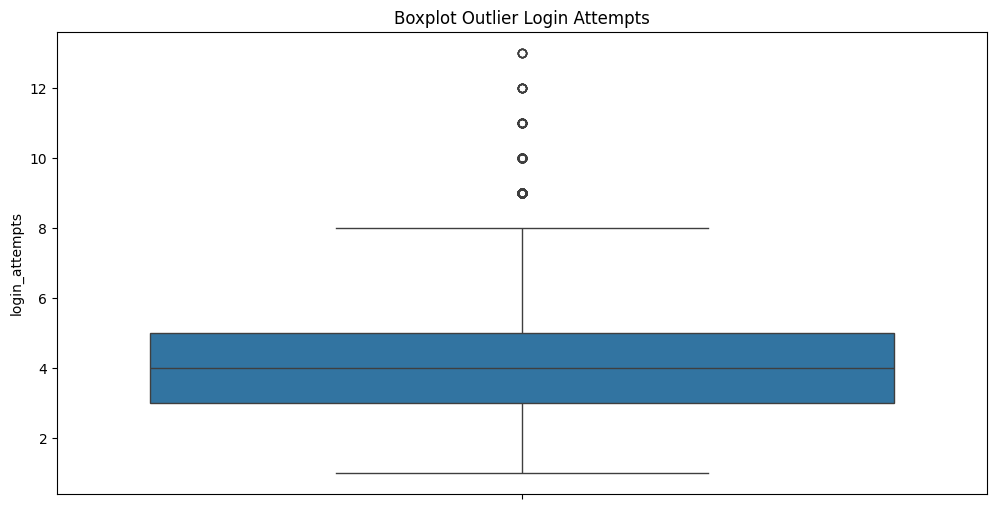

In [14]:
# Visualisasi boxplot login_attempts
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['login_attempts'])
plt.title('Boxplot Outlier Login Attempts')
plt.show()

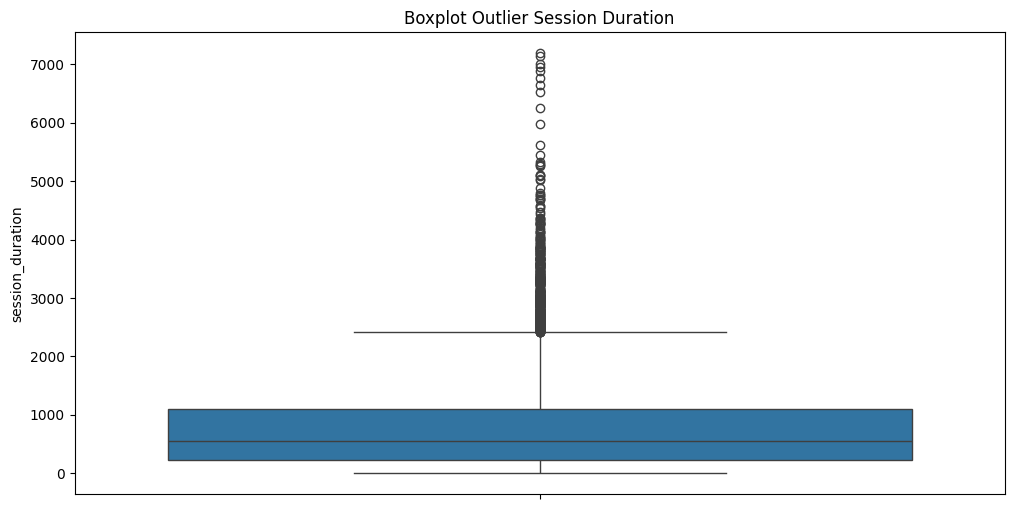

In [15]:
# Visualisasi boxplot session_duration
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['session_duration'])
plt.title('Boxplot Outlier Session Duration')
plt.show()

Penjelasan Boxplot:

* Kotak (box) menunjukkan interquartile range (IQR), yaitu rentang antara Q1 (kuartil pertama, 25%) dan Q3 (kuartil ketiga, 75%).

* Garis di dalam kotak adalah median atau Q2, yang menunjukkan nilai tengah dari distribusi.

* Whiskers (garis horizontal) menunjukkan rentang nilai dari data yang tidak dianggap outlier.

* Titik di luar whiskers menunjukkan outliers atau nilai ekstrim yang jauh dari rentang normal distribusi data.

Berdasarkan hasil deteksi outlier menggunakan metode Interquartile Range (IQR) dan juga visualisasi dari boxplot, ditemukan bahwa:

1. Kolom login_attempts

    Nilai batas bawah (Lower bound) adalah 0.0 dan batas atas (Upper bound) adalah 8.0. Artinya, setiap nilai di luar rentang ini dianggap sebagai outlier.Dari hasil pengecekan, terdapat 206 baris data yang memiliki nilai login_attempts melebihi batas atas, yaitu antara 9 hingga 11 kali percobaan login. Kondisi ini menunjukkan bahwa ada sebagian pengguna yang mencoba login secara berulang dalam jumlah yang tidak wajar, yang bisa menjadi indikasi aktivitas mencurigakan atau brute-force attack.

2. Kolom session_duration

    Nilai batas bawah (Lower bound) adalah -1078.19 dan batas atas (Upper bound) adalah 2415.52 detik. Secara praktis, batas bawah negatif diabaikan karena durasi sesi tidak mungkin bernilai negatif. Terdapat 418 baris data yang memiliki session_duration melebihi batas atas, dengan nilai mencapai lebih dari 4.000 detik. Nilai-nilai ini berpotensi menunjukkan sesi pengguna yang tidak normal atau aktivitas bot yang berlangsung dalam waktu sangat lama.

Dalam Dataset ini, saya tidak handling outlier dikarenakan outlier yang dihasilkan adalah outlier yang bisa menentukan apakah suatu program terkena serangan cyber atau tidak.

## 4.4 Menghitung Korelasi antar Fitur

Proses ini menghitung korelasi Pearson antar fitur utama dalam dataset, yaitu balance, purchases, payments, dan tenure. Korelasi ini menunjukkan seberapa kuat hubungan linear antara dua variabel, dengan nilai korelasi berkisar antara -1 hingga +1:

* +1 menunjukkan hubungan positif yang sempurna (ketika satu variabel naik, variabel lainnya juga naik).

* -1 menunjukkan hubungan negatif yang sempurna (ketika satu variabel naik, variabel lainnya turun).

* 0 menunjukkan tidak ada hubungan linear.

Hasil Korelasi yang dihitung memberikan informasi mengenai hubungan antar fitur dalam dataset yang dapat membantu dalam pemahaman lebih dalam tentang perilaku nasabah.

In [16]:
korelasi = num_list.corr(method='pearson')

print(f'Korelasi antar fitur :')
print(korelasi)

Korelasi antar fitur :
                     network_packet_size  login_attempts  session_duration  \
network_packet_size             1.000000       -0.001890          0.021650   
login_attempts                 -0.001890        1.000000          0.006392   
session_duration                0.021650        0.006392          1.000000   
ip_reputation_score             0.002320       -0.002618         -0.005077   
failed_logins                  -0.011676       -0.013507          0.019375   

                     ip_reputation_score  failed_logins  
network_packet_size             0.002320      -0.011676  
login_attempts                 -0.002618      -0.013507  
session_duration               -0.005077       0.019375  
ip_reputation_score             1.000000       0.015613  
failed_logins                   0.015613       1.000000  


### 4.4.1 Visualisasi Headmap

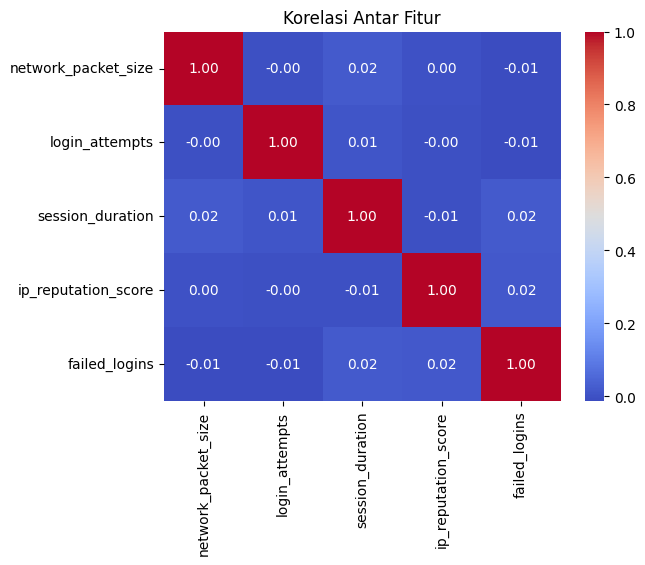

In [17]:
# Visualisasi korelasi
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

Visualisasi Korelasi dengan Heatmap:

Heatmap yang ditampilkan memberikan gambaran visual yang jelas tentang kekuatan hubungan antar fitur yang dihitung. Dengan menggunakan warna coolwarm, kita dapat dengan cepat mengidentifikasi korelasi yang kuat (warna merah untuk korelasi positif dan biru untuk korelasi negatif).

* Nilai yang lebih dekat ke +1 akan muncul dengan warna merah terang, yang menunjukkan hubungan yang sangat kuat antara dua fitur.

* Nilai yang lebih dekat ke 0 akan muncul dengan warna lebih terang (putih atau abu-abu), menunjukkan hubungan yang sangat lemah atau tidak ada hubungan sama sekali.

* Nilai yang lebih dekat ke -1 akan muncul dengan warna biru tua, yang menunjukkan hubungan negatif yang kuat.

Berdasarkan hasil analisis korelasi antar fitur menggunakan koefisien Pearson dan juga visualisasi dari Heatmap, diperoleh temuan sebagai berikut:

1. Tingkat Korelasi Rendah Secara Umum

    Semua nilai korelasi antar fitur berada sangat dekat dengan nol, berkisar antara -0.0135 hingga 0.0216. Hal ini menunjukkan bahwa secara linear, tidak ada hubungan kuat antar fitur pada dataset ini.

2. Pasangan Fitur dengan Korelasi Positif Tertinggi

    * session_duration dengan network_packet_size memiliki korelasi 0.02165 — meskipun tertinggi di tabel, nilainya tetap sangat kecil sehingga hubungannya hampir tidak signifikan.

    * failed_logins dengan ip_reputation_score memiliki korelasi 0.01561, yang juga termasuk lemah.

3. Pasangan Fitur dengan Korelasi Negatif

    * network_packet_size dengan failed_logins memiliki korelasi -0.01167, menunjukkan hubungan negatif yang sangat lemah.

    * login_attempts dengan failed_logins memiliki korelasi -0.01350, yang berarti sedikit indikasi bahwa semakin banyak upaya login, jumlah gagal login justru sedikit menurun, tetapi nilainya terlalu kecil untuk diambil kesimpulan kuat.

4. Implikasi terhadap Modeling

    * Korelasi yang rendah antar fitur ini mengindikasikan bahwa tidak ada masalah multikolinearitas signifikan di dataset.

    * Fitur-fitur yang ada kemungkinan memberikan informasi yang relatif unik, sehingga semuanya masih layak dipertimbangkan dalam proses pemodelan tanpa risiko redundansi yang tinggi.

## 4.5 Distribusi Fitur dengan Target

Distribusi kelas target:
attack_detected
0    5273
1    4264
Name: count, dtype: int64
attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64




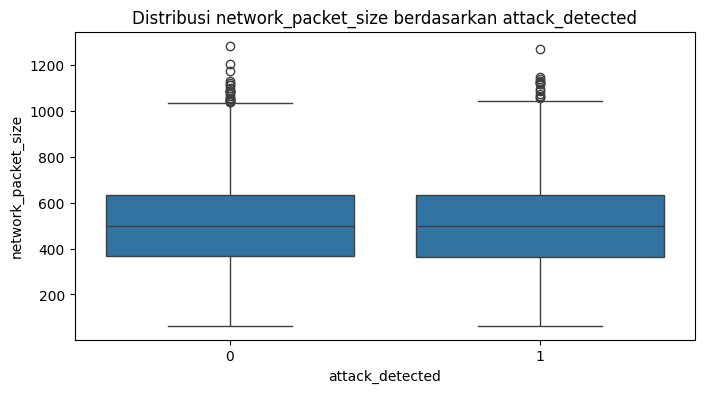

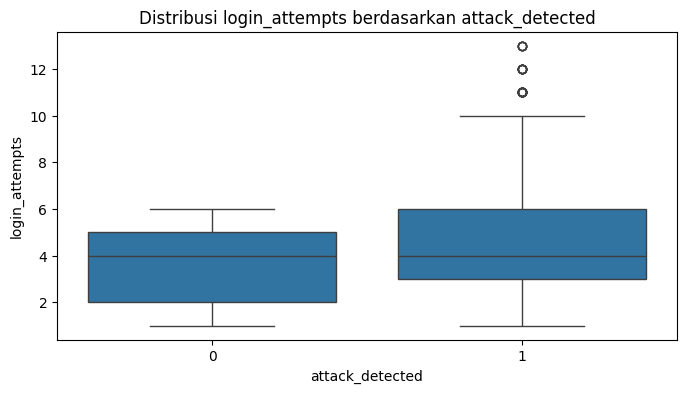

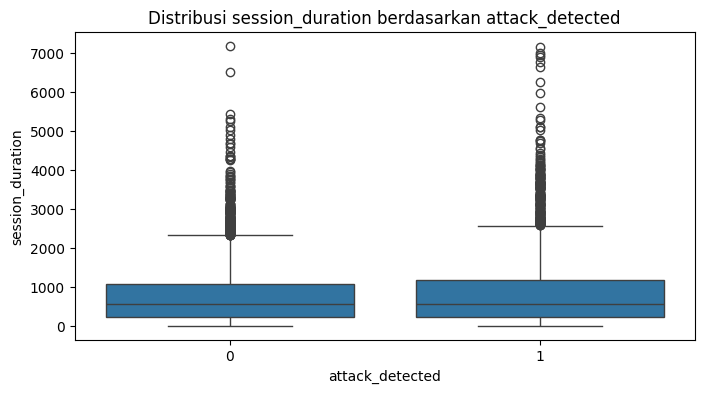

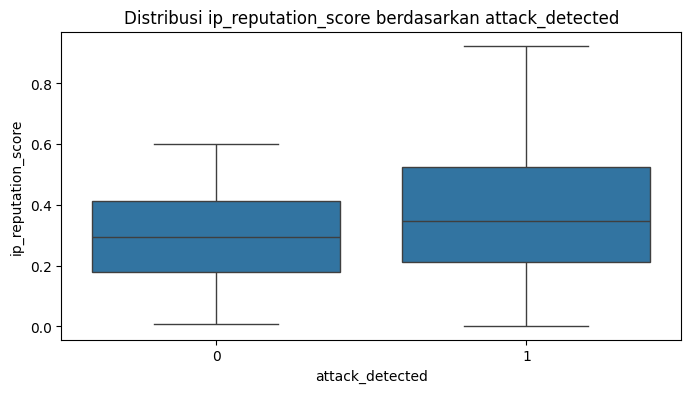

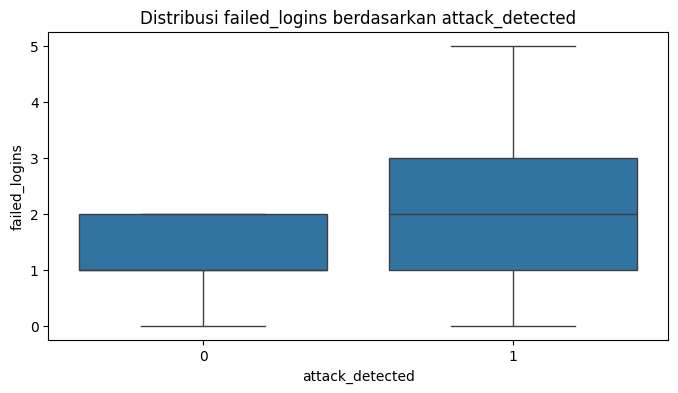

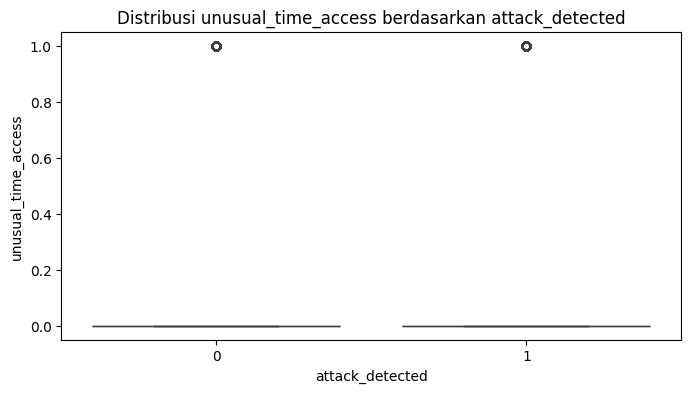

Crosstab unusual_time_access vs attack_detected:
attack_detected         0     1
unusual_time_access            
0                    4497  3610
1                     776   654
Chi-square test p-value: 0.41448

Point Biserial correlation antara attack_detected dan network_packet_size: -0.007 (p-value: 0.50682)
Point Biserial correlation antara attack_detected dan login_attempts: 0.277 (p-value: 0.00000)
Point Biserial correlation antara attack_detected dan session_duration: 0.042 (p-value: 0.00005)
Point Biserial correlation antara attack_detected dan ip_reputation_score: 0.212 (p-value: 0.00000)
Point Biserial correlation antara attack_detected dan failed_logins: 0.364 (p-value: 0.00000)


In [18]:
# 1. Distribusi kelas target
print("Distribusi kelas target:")
print(data[target_col].value_counts())
print(data[target_col].value_counts(normalize=True))
print("\n")

# 2. Visualisasi distribusi fitur numerik & encoded berdasarkan target
for col in list(num_list.columns) + encoded_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[target_col], y=data[col])
    plt.title(f'Distribusi {col} berdasarkan {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.show()

# 3. Crosstab & Chi-square test untuk encoded features vs target
for col in encoded_features:
    ct = pd.crosstab(data[col], data[target_col])
    print(f"Crosstab {col} vs {target_col}:")
    print(ct)
    chi2, p, dof, ex = chi2_contingency(ct)
    print(f"Chi-square test p-value: {p:.5f}\n")

# 4. Korelasi Point Biserial antara fitur numerik dan target
for col in num_list.columns:
    corr, p = pointbiserialr(data[target_col], data[col])
    print(f"Point Biserial correlation antara {target_col} dan {col}: {corr:.3f} (p-value: {p:.5f})")


Berdasarkan hasil analisis kita dapat menarik kesimpulan :
1. Distribusi Kelas Target

    Dataset memiliki target attack_detected yang terbagi menjadi 0 (tidak ada serangan) sebanyak 5.273 data atau 55,29%, dan 1 (serangan terdeteksi) sebanyak 4.264 data atau 44,71%.

    Perbandingan jumlah kelas ini relatif seimbang, sehingga tidak memerlukan teknik penyeimbangan kelas seperti oversampling atau undersampling secara mendesak.

2. Hubungan antara unusual_time_access dan attack_detected
    Crosstab menunjukkan distribusi:
    * Untuk akses di waktu normal (unusual_time_access = 0), terdapat 4.497 data tanpa serangan dan 3.610 data dengan serangan.
    * Untuk akses di waktu tidak biasa (unusual_time_access = 1), terdapat 776 data tanpa serangan dan 654 data dengan serangan.
    * Hasil uji Chi-square memberikan p-value 0.41448, yang berarti tidak ada hubungan signifikan secara statistik antara waktu akses yang tidak biasa dan kejadian serangan.

3. Korelasi Point-Biserial antara Fitur Numerik dan Target
    * network_packet_size : Korelasi -0.007 (p-value 0.50682), sangat lemah dan tidak signifikan.
    * login_attempts : Korelasi 0.277 (p-value 0.00000), menunjukkan hubungan positif sedang dan signifikan; semakin banyak upaya login, semakin besar kemungkinan terjadi serangan.
    * session_duration : Korelasi 0.042 (p-value 0.00005), hubungan positif sangat lemah namun signifikan.
    * ip_reputation_score : Korelasi 0.212 (p-value 0.00000), hubungan positif lemah namun signifikan; reputasi IP yang buruk cenderung berkorelasi dengan serangan.
    * failed_logins → Korelasi 0.364 (p-value 0.00000), hubungan positif sedang dan signifikan; semakin banyak gagal login, semakin besar kemungkinan terjadi serangan.

4. Kesimpulan Awal
    * Fitur yang paling relevan terhadap target berdasarkan korelasi adalah failed_logins dan login_attempts.
    * network_packet_size tidak memiliki kontribusi signifikan secara statistik.
    * unusual_time_access meskipun secara logika mungkin berhubungan, tidak menunjukkan hubungan signifikan pada data ini.

# 5. Feature Engineering

**Feature engineering** adalah proses mengubah, menciptakan, atau memilih fitur (variabel) dari data mentah agar model pembelajaran mesin (machine learning) dapat bekerja lebih baik. Tujuannya adalah untuk meningkatkan kinerja model dengan membuat representasi data yang lebih informatif, relevan, dan mudah dipahami oleh algoritma.

In [19]:
data

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,none,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


## 5.1 Feature Selection

**Feature selection** adalah proses memilih subset terbaik dari variabel yang paling relevan dan informatif dari seluruh kumpulan fitur dalam dataset, untuk digunakan dalam pembuatan model machine learning.

Disini saya drop kolom `session_id` karena kolom `session_id` tidak memberikan data yang kita perlukan, dan juga kolom tersebut hanya sebagai identifier unik id

In [20]:
data = data.drop(columns='session_id')
data

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...
9532,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,380,TCP,3,182.848475,none,0.408485,0,Chrome,0,0
9534,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [21]:
# Split between X (Features) & y (Target)
y = data['attack_detected']
X = data.drop(['attack_detected'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X train size :' ,X_train.shape)
print('X test size :' ,X_test.shape)
print('y train size :' ,y_train.shape)
print('y test size :' ,y_test.shape)

X train size : (7629, 9)
X test size : (1908, 9)
y train size : (7629,)
y test size : (1908,)


## 5.2 Scaling

**Scaling** adalah proses mengubah skala atau rentang nilai dari data numerik agar berada dalam rentang tertentu, sehingga model pembelajaran mesin dapat memprosesnya dengan lebih efisien dan akurat. Ini penting karena banyak algoritma pembelajaran mesin bekerja lebih baik jika fitur-fitur memiliki skala yang seragam.

In [23]:
# Deteksi kolom numerik
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Buat scaler
scaler = RobustScaler()

# Scaling kolom numerik
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

# Tampilkan beberapa baris untuk dicek
print(X_train_scaled.head())

      network_packet_size protocol_type  login_attempts  session_duration  \
1323             0.351852           UDP            -1.0         -0.179047   
2742             0.022222           UDP             1.0         -0.611954   
3582             1.414815           TCP            -0.5          1.026973   
5688            -0.948148           TCP             0.5          0.072310   
1614            -0.144444           TCP             0.0         -0.141617   

     encryption_used  ip_reputation_score  failed_logins browser_type  \
1323            none            -0.799168            2.0       Chrome   
2742             AES            -0.971959            0.0         Edge   
3582             AES            -0.531596            0.0       Chrome   
5688             AES             0.454036            1.0       Chrome   
1614            none            -0.034767            0.0       Chrome   

      unusual_time_access  
1323                  0.0  
2742                  0.0  
3582          

## 5.3 Menentukan Model Terbaik

In [24]:
# Preprocessor untuk encode kolom kategorikal
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

# Dictionary model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = {}

# Loop semua model dengan pipeline
for name, clf in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', clf)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "mean": np.mean(scores),
        "std": np.std(scores)
    }

# Cetak hasil
for name, res in results.items():
    print(f"{name} => Mean: {res['mean']:.4f}, Std: {res['std']:.4f}")

# Pilih model terbaik (mean tertinggi, std terendah)
best_model = max(results, key=lambda k: (results[k]['mean'], -results[k]['std']))
print("\nModel terbaik:", best_model)

Decision Tree => Mean: 0.8135, Std: 0.0045
Random Forest => Mean: 0.8912, Std: 0.0062
Gradient Boosting => Mean: 0.8934, Std: 0.0053
KNN => Mean: 0.5223, Std: 0.0084
SVM => Mean: 0.5591, Std: 0.0040

Model terbaik: Gradient Boosting


In [25]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

# Hasil perbandingan
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nPerbandingan Model:")
print(results_df)


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1042
           1       0.79      0.82      0.81       866

    accuracy                           0.82      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.82      0.82      0.82      1908


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       0.99      0.77      0.87       866

    accuracy                           0.89      1908
   macro avg       0.92      0.88      0.89      1908
weighted avg       0.91      0.89      0.89      1908


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.77      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
w

1. Dari lima algoritma yang diuji (KNN, SVM, Decision Tree, Random Forest, dan XGBoost), terlihat bahwa:
    * XGBoost memperoleh akurasi tertinggi (89,77%) dengan performa seimbang antara precision dan recall.
    * Random Forest menempati posisi kedua (89,41%) dengan hasil yang sangat mirip dengan Random Forest.
    * Decision Tree sedikit di bawah XGBoost (82,07%), menunjukkan bahwa model pohon tunggal pun sudah cukup kuat di dataset ini.
    * SVM menghasilkan akurasi 55.18%%, dengan kekuatan utama pada precision kelas positif (serangan) yang sangat tinggi (0.99).
    * KNN berada di posisi terakhir (51,51%), tertinggal cukup jauh dari model lainnya.

2. Analisis Berdasarkan Precision, Recall, dan F1-Score
    * Kelas 0 (Tidak Ada Serangan)
        - Semua model memiliki recall tinggi untuk kelas ini (> 0.92), artinya sebagian besar serangan yang tidak ada memang diprediksi dengan benar.
        - Random Forest bahkan mencapai recall sempurna (1.00) untuk kelas 0.

    * Kelas 1 (Serangan Terdeteksi)
        - Model pohon (Decision Tree, Random Forest, XGBoost) memiliki precision tinggi (> 0.95), artinya jarang salah memprediksi serangan ketika model bilang "serangan".
        - Namun recall untuk kelas ini sedikit menurun, berkisar antara 0.74 – 0.78, menunjukkan masih ada serangan yang tidak terdeteksi (false negative).
        - KNN memiliki recall 0.39 untuk kelas serangan, yang cukup rendah dibanding model lainnya.

3. Pola yang Terlihat
    * Random Forest dan XGBoost unggul karena dapat menangkap pola non-linear dan interaksi antar fitur dengan baik.

    * SVM unggul di precision untuk serangan (nyaris sempurna), cocok jika tujuan utama adalah meminimalkan false positive meski dengan risiko melewatkan sebagian serangan.

    * KNN tampaknya kurang cocok untuk dataset ini, kemungkinan karena distribusi data atau jumlah fitur membuat jarak antar data kurang representatif.

4. Rekomendasi
    * XGBoost dapat dijadikan baseline utama karena akurasi tertinggi dan performa yang stabil di semua metrik.
    * Random Forest bisa digunakan jika ingin optimasi lanjutan.
    * Jika fokus bisnis adalah tidak boleh salah memprediksi serangan (precision tinggi untuk kelas 1), maka SVM bisa jadi pilihan.
    * KNN dan SVM sebaiknya dihindari atau di-tuning ulang secara signifikan.

# 6. Model Definition

Pada tahap ini, model didefinisikan berdasarkan tujuan prediksi dan karakteristik data. Beberapa algoritma yang digunakan beserta alasannya:

1. XGBoost (Boosting)

    Alasan penggunaan:

    * Salah satu algoritma boosting yang sangat efisien dan akurat untuk data tabular, mampu menangani data imbang maupun tidak imbang.

    * Setelah dilakukan perhitungan, XGBoost memiliki nilai yang terbaik, dengan Mean 0.89 dan juga akurasi yang cukup tinggi (89.77%)

    Hyperparameter:

    * learning_rate=0.1, kecepatan pembelajaran model.

    * n_estimators=100, jumlah boosting rounds.

    * max_depth=6, kedalaman pohon per boosting.

    * eval_metric='logloss', evaluasi berbasis probabilitas.

    Metrics:
    Accuracy, precision, recall, F1-score.

# 7. Model Training

**Model Training** adalah tahap dalam pembelajaran mesin (machine learning) di mana algoritma belajar untuk mengenali pola atau hubungan dalam data. Proses ini melibatkan penggunaan data untuk melatih model sehingga model tersebut dapat memahami dan menggeneralisasi pola-pola tersebut untuk membuat prediksi atau keputusan pada data baru yang belum pernah dilihat sebelumnya.

In [26]:
# Definisikan parameter grid untuk model XGBoost
param_grids = {
    'XGBoost': {
        'model__learning_rate': [0.01, 0.1],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6]
    }
}

# Buat pipeline model
models = {
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(eval_metric='logloss', random_state=42))
    ])
}

# Hyperparameter Tuning
best_models = {}
results = []

for name, pipeline in models.items():
    print(f"Running GridSearchCV for {name}")
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Best Params': grid.best_params_, 'Accuracy': acc})
    
    print(f"\n=== {name} Best Model Performance ===")
    print(f"Best Parameters: {grid.best_params_}")
    print(classification_report(y_test, y_pred))
    print("-"*40)

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("Summary of Model Performances:")
print(results_df)


Running GridSearchCV for XGBoost
Fitting 5 folds for each of 8 candidates, totalling 40 fits

=== XGBoost Best Model Performance ===
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.77      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908

----------------------------------------
Summary of Model Performances:
     Model                                        Best Params  Accuracy
0  XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...  0.895702


1. Proses GridSearchCV

    * GridSearchCV dijalankan untuk XGBoost dengan 5 fold cross-validation.

    * Terdapat 8 kombinasi parameter yang diuji (learning_rate, max_depth, n_estimators), sehingga total ada 40 percobaan (fits).

    * Tujuan GridSearchCV adalah menemukan kombinasi parameter terbaik untuk memaksimalkan performa model.

# 8. Model Evaluation

Setelah melakukan pelatihan pada beberapa model dengan variasi hyperparameter, kita evaluasi performa model menggunakan metrik accuracy, precision, recall, dan f1-score.

Evaluasi model terbaik: XGBoost


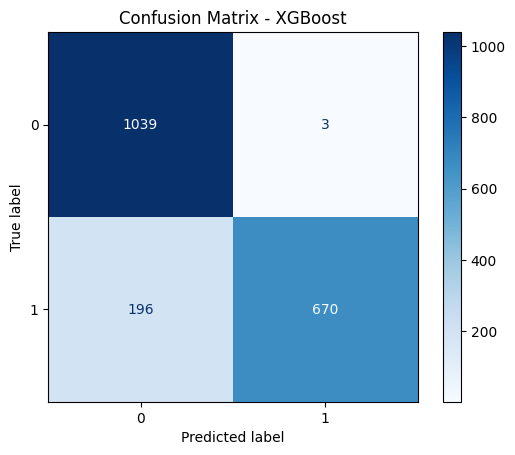

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.77      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908



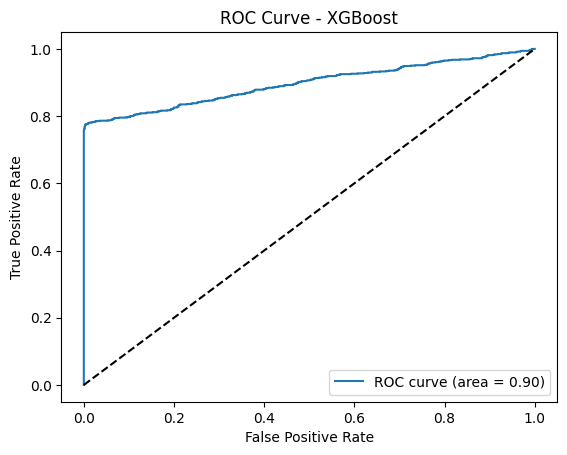

In [27]:
for name, model in best_models.items():
    print(f"Evaluasi model terbaik: {name}")
    
    # Prediksi test set
    y_pred = model.predict(X_test)
    y_proba = None
    
    # Beberapa model punya probabilitas prediksi, kalau ada ambil untuk ROC
    if hasattr(model.named_steps['model'], "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # probabilitas kelas positif
    elif hasattr(model.named_steps['model'], "decision_function"):
        y_proba = model.decision_function(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve jika tersedia probabilitas
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    print("="*50)


In [28]:
# Cek keseimbangan target
target = data['attack_detected']

# Hitung distribusi kelas
class_dist = target.value_counts(normalize=True)
print("Distribusi kelas:\n", class_dist)

# Cek keseimbangan
threshold = 0.7  # jika satu kelas >70% dianggap tidak seimbang
if class_dist.max() > threshold:
    print("\nDataset tidak seimbang. Lebih baik gunakan metrik: Precision, Recall, F1-Score, ROC-AUC")
else:
    print("\nDataset seimbang. Akurasi bisa digunakan sebagai metrik utama")


Distribusi kelas:
 attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64

Dataset seimbang. Akurasi bisa digunakan sebagai metrik utama


 Berikut ringkasan hasil evaluasi:

1. XGBoost

    * Model boosting ini menunjukkan performa yang sangat kompetitif. XGBoost juga dikenal efisien untuk dataset besar dan kompleks, sehingga menjadi kandidat kuat untuk implementasi lebih lanjut.
    * Hasil tuning meningkatkan akurasi mendekati 90%.
    * Model XGBoost ini cukup stabil dan dapat diandalkan untuk mendeteksi pola serangan siber.
    * Bisa menjadi model final sebelum deployment atau dilakukan evaluasi tambahan seperti ROC-AUC untuk imbalanced dataset.

Kesimpulan :

1. XGBoost adalah model terbaik untuk kasus ini berdasarkan metrik evaluasi, khususnya dari sisi akurasi dan keseimbangan precision-recall pada kelas positif.
2. Model mendeteksi kelas mayoritas dengan sangat baik.
3. Kelas minoritas (misal kasus serangan) sedikit terlewat, kemungkinan karena imbalance dataset.

# 9. Model Saving

In [ ]:
best_model_name = results_df.iloc[0]['Model']  # Ambil nama model dengan akurasi tertinggi
best_model = best_models[best_model_name]     # Ambil objek model terbaik

# Simpan model terbaik ke file
filename = f"{best_model_name}_best_model.joblib"
joblib.dump(best_model, filename)

print(f"Model terbaik '{best_model_name}' telah disimpan ke file '{filename}'.")

# 10. Pengambilan Keputusan

Berdasarkan rangkaian analisis dan pemodelan yang telah dilakukan, dapat disimpulkan bahwa XGBoost merupakan model terbaik untuk memprediksi risiko intrusi siber pada dataset yang digunakan. Pemilihan model didasarkan pada evaluasi cross-validation yang menunjukkan mean akurasi tertinggi dan standar deviasi terendah, menandakan performa yang stabil.

Hasil tuning parameter GridSearchCV lebih lanjut meningkatkan performa model, menghasilkan akurasi sebesar ~90%, dengan precision dan recall yang seimbang untuk kedua kelas (serangan dan bukan serangan). Hal ini menunjukkan bahwa model mampu mendeteksi serangan siber dengan akurat sekaligus meminimalkan false positive dan false negative.

Dengan demikian, objective awal proyek—yaitu membangun sistem prediksi risiko intrusi siber yang andal—telah tercapai. Model ini siap digunakan untuk mendeteksi serangan pada data baru, memberikan dasar yang kuat untuk pengambilan keputusan terkait keamanan jaringan.